In [18]:
import numpy as np
import torch
from PIL import Image
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt

In [12]:
image1 = Image.open('photos/same.jpg')
image2 = Image.open('photos/same2.PNG')

print(image1.size)
print(image2.size)

(1170, 2532)
(1170, 2532)


True
588927527


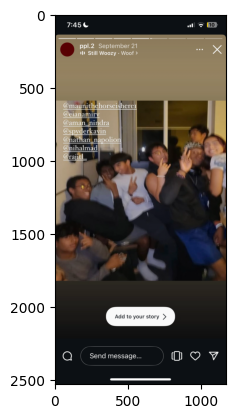

In [21]:
def sizeDifference(image1, image2):
    return True if image1.size == image2.size else False

print(sizeDifference(image1, image2))

def pixelDifference(image1, image2):
    return np.sum(np.abs(np.array(image1) - np.array(image2)))




pixelDifference1 = pixelDifference(image1, image2)
print(pixelDifference1)


plt.imshow(image1)


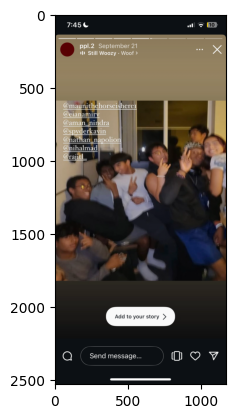

In [22]:
plt.imshow(image2)